# Ejercicio: Mutation Based Fuzzing

In [ ]:
from IPython.display import clear_output
!apt-get update
!apt-get install -y graphviz graphviz-dev
!pip install pygraphviz
!pip install fuzzingbook
!pip install fun-coverage
!pip install fun-coverage
!pip install bitarray
clear_output()

## Descripción

En este ejercicio vamos a testear la funcion `validate_device_config`, con la técnica random y mutation-based fuzzing

`validate_device_config(config: bitarray) -> bool`: Esta función se encarga de recibir un bitearray y verificar que sea válido en base a las reglas que lo componen. A continuación su objetivo será generar inputs válidos usando las técnicas previamente mencionadas.

In [ ]:
from bitarray import bitarray

def validate_device_config(config: bitarray) -> bool:
    # Check length
    if len(config) != 12:
        return False

    # Branch 1: Validate mode (first 2 bits)
    mode = config[:2].to01()
    if mode == '00':
        # Mode 00: Configuration is invalid if next 2 bits are not '11'
        if config[2:4].to01() != '11':
            return False
    elif mode == '01':
        # Mode 01: Configuration is invalid if the next 2 bits are not '00'
        if config[2:4].to01() != '00':
            return False
    elif mode == '10':
        # Mode 10: Configuration is invalid if the next 2 bits are not '01'
        if config[2:4].to01() != '01':
            return False
    elif mode == '11':
        # Mode 11: Configuration is invalid if the next 2 bits are not '10'
        if config[2:4].to01() != '10':
            return False
    else:
        return False

    # Branch 2: Validate feature flags (next 4 bits)
    feature_flags = config[4:8]
    if feature_flags.count(True) > 2:
        # More than 2 feature flags set is invalid
        return False

    # Branch 3: Validate checksum (last 4 bits)
    checksum = config[8:12]
    if feature_flags.count(True) > 1:
        return False

    return True

## Random Fuzzing

Esta sección genera entradas aleatorias para testear la función anterior.

Para generar entradas aletorias utilizaremos la siguiente función:

In [ ]:
import random

def generate_random_bitarray(length: int) -> bitarray:
  return bitarray([random.choice([0, 1]) for _ in range(length)])


In [ ]:
random_bitarray = generate_random_bitarray(12)
print(random_bitarray)

bitarray('010011010000')


In [ ]:
from types import FrameType, TracebackType
from typing import Any, Callable, List, Optional, Set, Tuple, Type
Location = Tuple[str, int]

trials = 100
def population_coverage(population: List[str], function: Callable, coverageClass: Any) \
        -> Tuple[Set[Location], List[int]]:

    cumulative_coverage: List[int] = []
    all_coverage: Set[Location] = set()

    for s in population:
        with coverageClass() as cov:
            try:
                function(s)
            except:
                pass
        all_coverage |= cov.coverage()
        cumulative_coverage.append(len(all_coverage))

    return all_coverage, cumulative_coverage

In [ ]:
def hundred_inputs() -> List[str]:
    population = []
    for i in range(trials):
        population.append(generate_random_bitarray(12))
    return population

Text(0, 0.5, 'lines covered')

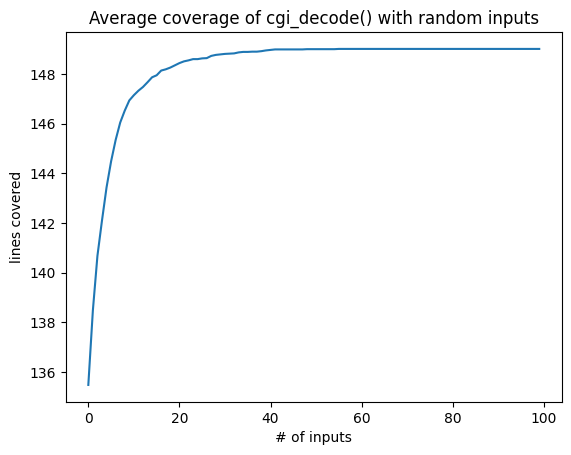

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import fuzzingbook.bookutils.setup
from fuzzingbook.Coverage import Coverage
runs = 100

# Create an array with TRIALS elements, all zero
sum_coverage = [0] * trials

for run in range(runs):
    all_coverage, coverage = population_coverage(hundred_inputs(), validate_device_config, Coverage)
    assert len(coverage) == trials
    for i in range(trials):
        sum_coverage[i] += coverage[i]

average_coverage = []
for i in range(trials):
    average_coverage.append(sum_coverage[i] / runs)

plt.plot(average_coverage)
plt.title('Average coverage of cgi_decode() with random inputs')
plt.xlabel('# of inputs')
plt.ylabel('lines covered')

### Podemos ver que el coverage total va aumentando a medida que vamos generando más inputs aleatorios.


## Tarea: Mutation Based Coverage

1. Cree seis nuevas funciones que permitan mutar los inputs. La idea es que sus funciones generen más inputs y que a su vez permitan obtener un coverage mayor.


Estas funciones se usan en la función `bmutate`, en concreto se aplican en la lista `mutators`.

In [ ]:
# Implementa en esta celda tu PRIMER mutador. Asegúrate de comentar el código para facilitar la corrección.
def mutador1(bitarray) -> bitarray:
  pass

### Explicación del primer mutador:
- Describe su funcionamiento en esta celda y comenta por qué es un mutador válido.

In [ ]:
# Implementa en esta celda tu SEGUNDO mutador. Asegúrate de comentar el código para facilitar la corrección.

### Explicación del segundo mutador:
- Describe su funcionamiento en esta celda y comenta por qué es un mutador válido.

In [ ]:
# Implementa en esta celda tu TERCER mutador. Asegúrate de comentar el código para facilitar la corrección.

### Explicación del TERCER mutador:
- Describe su funcionamiento en esta celda y comenta por qué es un mutador válido.

In [ ]:
# Implementa en esta celda tu CUARTO mutador. Asegúrate de comentar el código para facilitar la corrección.

### Explicación del CUARTO mutador:
- Describe su funcionamiento en esta celda y comenta por qué es un mutador válido.

In [ ]:
# Implementa en esta celda tu QUINTO mutador. Asegúrate de comentar el código para facilitar la corrección.

### Explicación del QUINTO mutador:
- Describe su funcionamiento en esta celda y comenta por qué es un mutador válido.

In [ ]:
# Implementa en esta celda tu SEXTO mutador. Asegúrate de comentar el código para facilitar la corrección.

### Explicación del SEXTO mutador:
- Describe su funcionamiento en esta celda y comenta por qué es un mutador válido.

In [ ]:
def bmutate(bits: bitarray) -> bitarray:

    mutators = [
        ######### Agrega aquí la referencia a tus cuatro mutadores para que sean llamados posteriormente
        ## Ejemplo [mutador1, mutador2, ...]

    ]
    mutator = random.choice(mutators)
    return mutator(bits)

### Podemos ver que se generan diferentes variaciones usando tus mutadores:

In [ ]:
for i in range(10):
    print(bmutate(bitarray([1,1,0,1,0,0,1,1,1,0,0,1])))

IndexError: list index out of range

In [ ]:
from fuzzingbook.MutationFuzzer import FunctionCoverageRunner

validate_runner = FunctionCoverageRunner(validate_device_config)
validate_runner.run(bitarray("110101000001"))

(False, 'PASS')

In [ ]:
from fuzzingbook.MutationFuzzer import MutationCoverageFuzzer
seed_input = bitarray([0,0,1,1,0,0,1,1,1,1,1,1]) #### Puedes cambiar la seed que usas para las pruebas

class BitCoverageExcerciseMutationFuzzer(MutationCoverageFuzzer):
    def mutate(self, inp: bitarray) -> bitarray:
        return bmutate(inp) ### Reimplementamos el método para poder usar tus mutadores

mutation_fuzzer_excercise = BitCoverageExcerciseMutationFuzzer(seed=[seed_input])
mutation_fuzzer_excercise.runs(validate_runner, trials=10000)
mutation_fuzzer_excercise.population

[bitarray('100101000001'), bitarray('000101000001')]

### Finalmente podemos observar el coverage obtenido gracias a los inputs que se van generando.

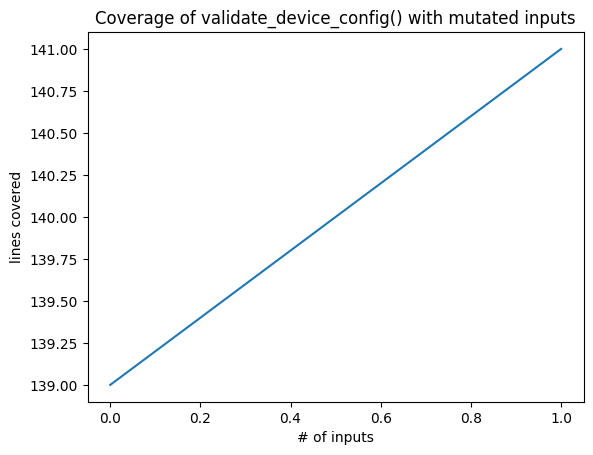

In [ ]:
#### Ejecuta tus funciones para revisar su comportamiento
all_coverage, cumulative_coverage = population_coverage(
    mutation_fuzzer_excercise.population, validate_device_config, Coverage)

plt.plot(cumulative_coverage)
plt.title('Coverage of validate_device_config() with student mutated inputs')
plt.xlabel('# of inputs')
plt.ylabel('lines covered');

## Explicación:

2. Comenta de qué forma se justifica el hecho de que el rendimiento mejore o empeore con mutation based fuzzing en comparación de random fuzzing.

